In [1]:
import numpy, sys, math
from  matplotlib import pyplot as plt
import numpy as np
import scipy.linalg as cp

def implicit(alpha,u,N,T):
    N = N+1
    aux = np.zeros(N)
    aux[0] = 1.+2.*alpha
    aux[1] = -alpha
    A = cp.toeplitz(aux)
    A[0] = A[-1]= 0
    A[0,0] = A[-1,-1] = 1
    A = cp.inv(A, overwrite_a=True, check_finite=True)
    for ii in range(1,T):
        uaux = u[ii-1]
        tt = A@uaux
        u[ii] = tt
    return(u)

N  =   10
dt =   5e-3
T =   400

u = numpy.zeros((T,N+1),numpy.double)
(x,dx) = numpy.linspace (0,1,N+1, retstep=True)
alpha = dt/(dx**2)
print(x,dx, alpha)

#Initial coditions
u[0,-1] = 1.
#print(u)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ] 0.1 0.4999999999999999


In [2]:
u = implicit(alpha,u,N,T)
#print(u[-1])

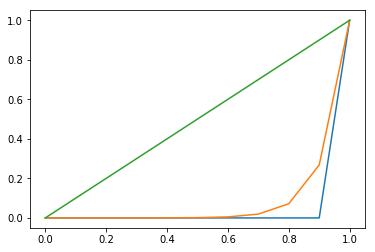

In [3]:
plt.plot(x, u[0])
plt.plot(x, u[1])
#plt.plot(x, u[2])
#plt.plot(x, u[3])
plt.plot(x, u[-1])
plt.show()

In [4]:
print(u[0])
print(u[1])
print(u[-1])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.00000000e+00 6.60868646e-06 2.64347458e-05 9.91302969e-05
 3.70086442e-04 1.38121547e-03 5.15477544e-03 1.92378863e-02
 7.17967697e-02 2.67949192e-01 1.00000000e+00]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
